# Computing the Parameter Values + Naive Tension Metrics

Things to improve:
* Choosing KDE parameters
* Change to using either only MCSample objects (getDist) or ChainConsumer objects, now using both, or writing new functions to do what we call them for
* Add the best fit from a search

In [1]:
import numpy as np
import pylab as mplot
import os
import scipy
import pandas as pd
from getdist import plots, MCSamples
from chainconsumer import ChainConsumer

%pylab inline

Color = ['#d45e00', 'grey','k', 'purple']

font = {'size'   : 18}
mplot.rc('font', **font)
mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from cosmosis_functions import *

## Load Chains

In [3]:
# Load KiDS-1000
kids_dir =  '../../KiDS1000_cosmis_shear_data_release/chains_and_config_files/main_chains_iterative_covariance/xipm/chain/'
kids1000_filename = kids_dir+'output_multinest_C.txt'
kids1000_headers = ['omch2','ombh2','h0','n_s','s8_in','B','IA_A','z1','z2','z3','z4','z5','c0','S8','sigma8','A_s','Omega_m','omega_nu','lambda','cosmotheta','zz1','zz2','zz3','zz4','zz5','dz1','dz2','dz3','dz4','dz5']

kids1000_chain = load_cosmosis_chain(kids1000_filename,kids1000_headers,caster='omch2',doS8=True,flipz=True)

In [4]:
# Load HSC 
hsc_dir = '../HSC_hamana2020_fiducial/'
hsc_filename = hsc_dir+'hsc_hamana2020_fiducial.txt'
hsc_headers = ['Omega_c','As','Omega_b','n_s','h0','IA_A','eta_IA','z1','z2',
                 'z3','z4','alpha0','beta0','m0','Omega_m','sigma8','S8','S845','Omega_L','ts','Omega_nu']

hsc_chain = load_cosmosis_chain(hsc_filename,hsc_headers,doS8=False,add_cols_end=None,add_cols_front=['weights','posterior'])

In [5]:
# Load DESY1
des_dir = '../'
des_filename = des_dir+'s_l3.txt'
des_headers = ['Omega_m','h0','Omega_b','ns','As','Onuh2','m1','m2','m3','m4',
                         'alpha','eta','zs1','zs2','zs3','zs4','sigma8']
desy1_chain = load_cosmosis_chain(des_filename,des_headers,doS8=True,add_cols_end=['posterior','weights'],add_cols_front=None)

## Load Samples + Plot Contours 

In [6]:
# Load the Samples, pass and return sample id's so we don't mix up the order

Sample_ids = ['kids1000','desy1','hsc']
parameters = ['Omega_m','sigma8','S8']
Samples = load_samples(chains=[kids1000_chain,desy1_chain,hsc_chain],ids=Sample_ids,parameters=parameters)

Removed no burn in
Removed no burn in
Removed no burn in


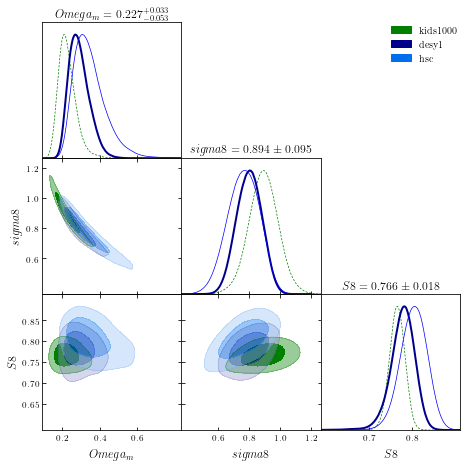

In [7]:
parameters = ['Omega_m','sigma8','S8']
triangle_plot(Samples,Sample_ids,parameters,width=2.5)

## Parameter Values

* Mean posterior 
* Maximum posterior from multinest chain 
* (Best fit found from post-run, e.g. Nelder-Mead)

### Mean 

HSC Cosmic Shear
* https://arxiv.org/pdf/1906.06041.pdf
* HSC Published Quoted Value: $S_{8} = 0.804 + 0.032 - 0.029$ $\Omega_m = 0.346 + 0.052, - 0.1 $

In [8]:
parlims_hsc_mean = get_parlims_mean_getDist(hsc_chain,parameters,interval='68')
parlims_hsc_mean.show_pm()

Removed no burn in
Omega_m : 0.346, + 0.052 - 0.100
sigma8 : 0.766, + 0.110 - 0.098
S8 : 0.804, + 0.032 - 0.029


In [9]:
parlims_kids1000_mean = get_parlims_mean_getDist(kids1000_chain,parameters,interval='68')
parlims_kids1000_mean.show_pm()

Removed no burn in
Omega_m : 0.227, + 0.033 - 0.053
sigma8 : 0.894, + 0.093 - 0.092
S8 : 0.766, + 0.018 - 0.018


In [10]:
parlims_desy1_mean = get_parlims_mean_getDist(desy1_chain,parameters,interval='68')
parlims_desy1_mean.show_pm()

Removed no burn in
Omega_m : 0.290, + 0.040 - 0.064
sigma8 : 0.802, + 0.082 - 0.083
S8 : 0.778, + 0.030 - 0.023


### Max

DESY1 Cosmic Shear
* https://arxiv.org/pdf/1708.01538.pdf
* DESY1 Published Quoted Value: $S_{8} = 0.782 \pm{0.027}$ $\Omega_m = 0.260 +0.065, - 0.037 $

In [11]:
parlims_desy1_max = get_parlims_maxpost_chainconsumer(desy1_chain,['Omega_m','S8','sigma8'],kde=0.5)
parlims_desy1_max.show_pm()

Omega_m : 0.260, + 0.068 - 0.040
sigma8 : 0.824, + 0.056 - 0.112
S8 : 0.782, + 0.027 - 0.028


In [12]:
parlims_hsc_max = get_parlims_maxpost_chainconsumer(hsc_chain,['Omega_m','S8','sigma8'],kde=0.5)
parlims_hsc_max.show_pm()

Omega_m : 0.302, + 0.093 - 0.063
sigma8 : 0.750, + 0.131 - 0.080
S8 : 0.810, + 0.027 - 0.035


In [13]:
parlims_kids1000_max = get_parlims_maxpost_chainconsumer(kids1000_chain,['Omega_m','S8','sigma8'],kde=0.5)
parlims_kids1000_max.show_pm()

S8 : 0.765, + 0.019 - 0.017
sigma8 : 0.896, + 0.093 - 0.095
Omega_m : 0.210, + 0.052 - 0.037


## Naive Tensions

* TODO , fix the extra subplot to get the legend 

In [14]:
import matplotlib.colors as mcolors

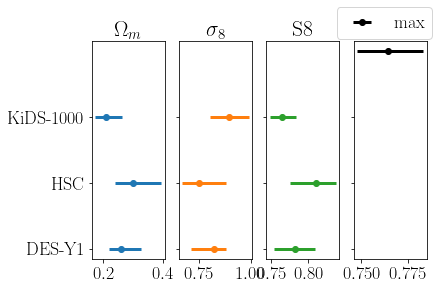

In [15]:
parlims_maxes = [parlims_desy1_max,parlims_hsc_max,parlims_kids1000_max]
values = ['DES-Y1','HSC','KiDS-1000']
parameters = ['Omega_m','sigma8','S8']
title_parameters = [r'$\Omega_{m}$',r'$\sigma_{8}$',r'S$8$'] #latex-ify them, might be a way to do this automatically

plot_parlims(parlims_maxes,values,parameters,title_parameters,stats=['max'])

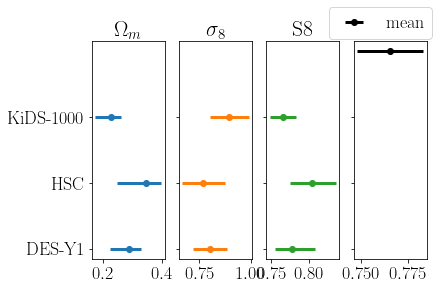

In [16]:
parlims_means = [parlims_desy1_mean,parlims_hsc_mean,parlims_kids1000_mean]
values = ['DES-Y1','HSC','KiDS-1000']
parameters = ['Omega_m','sigma8','S8']
title_parameters = [r'$\Omega_{m}$',r'$\sigma_{8}$',r'S$8$'] #latex-ify them, might be a way to do this automatically

plot_parlims(parlims_means,values,parameters,title_parameters,stats=['mean'])

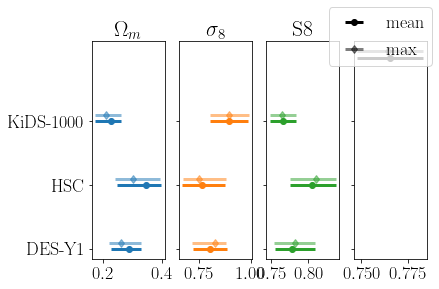

In [17]:
parlims = [parlims_means,parlims_maxes]
values = ['DES-Y1','HSC','KiDS-1000']
parameters = ['Omega_m','sigma8','S8']
title_parameters = [r'$\Omega_{m}$',r'$\sigma_{8}$',r'S$8$'] #latex-ify them, might be a way to do this automatically

plot_parlims(parlims,values,parameters,title_parameters,stats=['mean','max'])

In [18]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st